<a href="https://colab.research.google.com/github/roshanappa/Time-Series-Analysis-Projects-/blob/master/Time_Series_Analysis_On_Stationary_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Import Datasets.

In [111]:
from zipfile import ZipFile

In [112]:
with ZipFile('/content/64789_128364_bundle_archive.zip') as zip:
  zip.extractall()
  print('Done')

Done


In [113]:
data = pd.read_csv('/content/daily-total-female-births-CA.csv')

In [115]:
data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [116]:
data.tail()

,date,births
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


In [117]:
data.isnull().sum()

date      0
births    0
dtype: int64

In [118]:
data.dtypes

date      object
births     int64
dtype: object

In [119]:
data.shape

(365, 2)

## Data Visualization & Data Transformation.


In [120]:
data['date'].dtypes  #Found Object Dtypes.

dtype('O')

In [121]:
data['date'] = pd.to_datetime(data['date'])

In [122]:
data['date'].dtypes

dtype('<M8[ns]')

In [123]:
data.set_index(data['date'],inplace=True)

In [124]:
data.drop(columns=['date'],inplace=True)

In [125]:
data.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


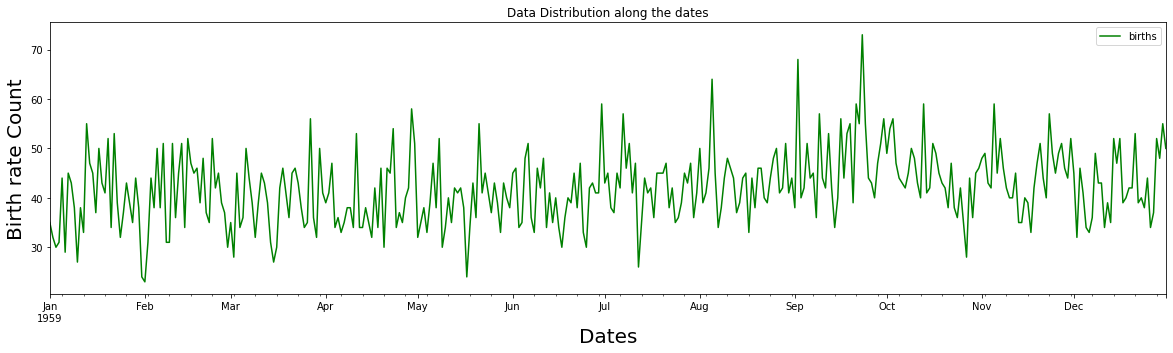

In [126]:
data.plot(kind='line',color ='g',figsize=(20,5),title='Data Distribution along the dates')
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Birth rate Count',fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

- Data inside the series is not looking like the Sesonal or trend but we dont have proof till now.
- In this kind of situaltion we are just considering on the basis of visualization that it is Stationary series.


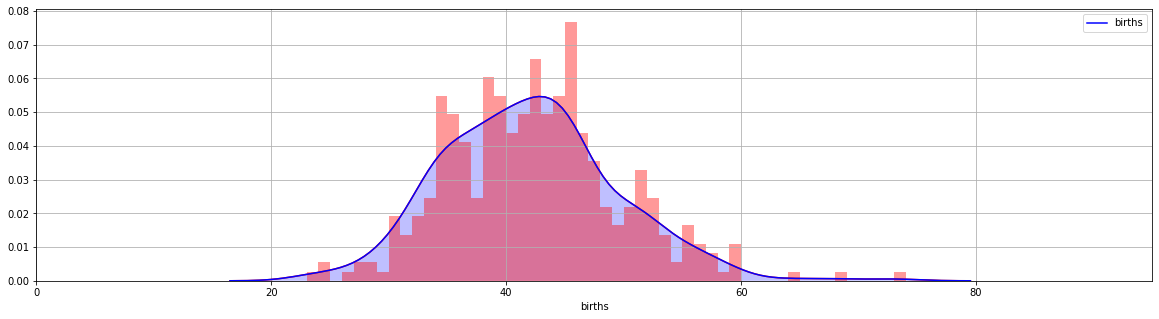

In [127]:
plt.figure(figsize=(20,5))
ax = sns.distplot(data['births'],color='r',bins=range(200))
sns.kdeplot(data['births'],color='b',shade=True,ax=ax)
plt.xlim([0,95])
plt.grid()
plt.show()

In this kind of visualization we can clearly see that High number of Birth rate in between the 30 to 50.

And the less number of Birth rate in 20 to 30 and then 60 to 80.


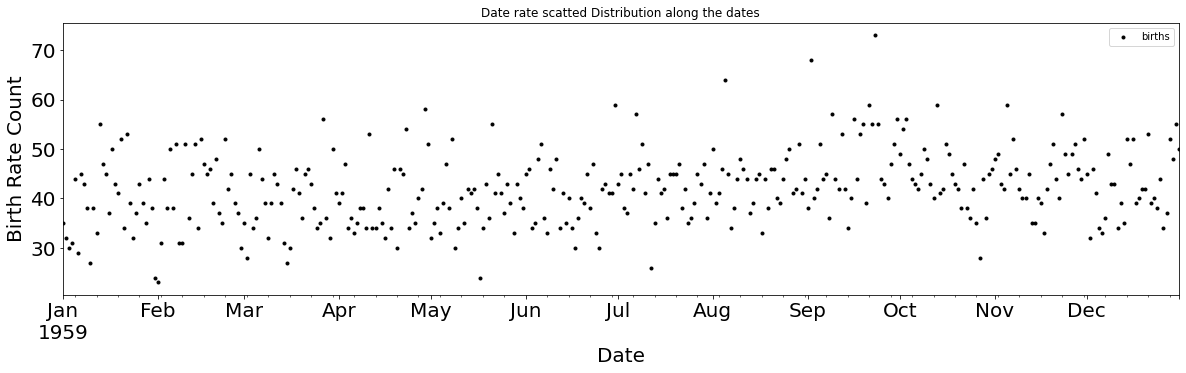

In [128]:
data.plot(style='.k',figsize=(20,5),title='Date rate scatted Distribution along the dates')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Birth Rate Count',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In this scattered plot we can see the scattered points are moving in straight line.Since the data is not showing any seasonality.

In [129]:
window_moving_avg = data.rolling(window=20).mean()
window_moving_std = data.rolling(window=20).std()

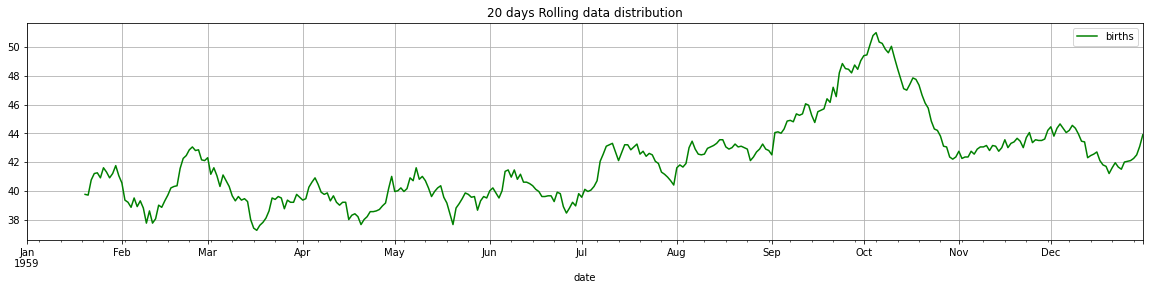

In [130]:
window_moving_avg.plot(figsize=(20,4),color='g',title='20 days Rolling data distribution')
plt.grid()
plt.show()

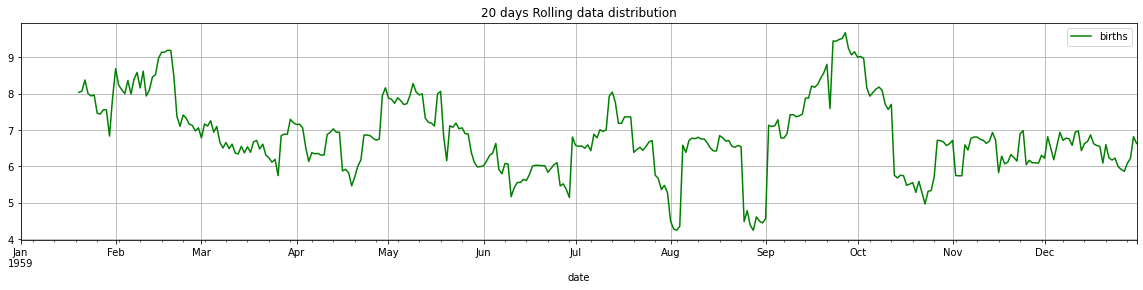

In [131]:
window_moving_std.plot(figsize=(20,4),color='g',title='20 days Rolling data distribution')
plt.grid()
plt.show()

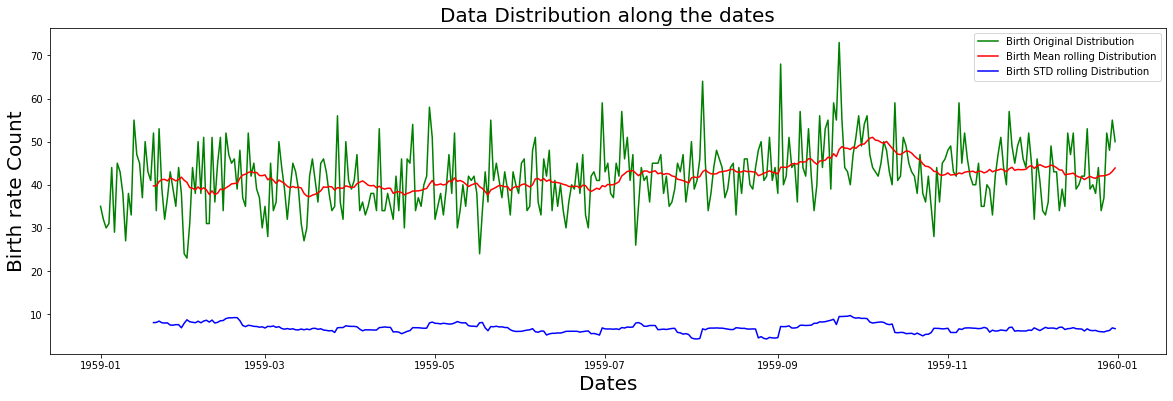

In [132]:
plt.figure(figsize=(20,6))
plt.plot(data['births'],color ='g')
plt.plot(window_moving_avg,color ='r')
plt.plot(window_moving_std,color ='b')
plt.title('Data Distribution along the dates',fontsize=20)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Birth rate Count',fontsize=20)
plt.legend(['Birth Original Distribution','Birth Mean rolling Distribution','Birth STD rolling Distribution'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [133]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [134]:
seasonal_data = seasonal_decompose(data,model='additive')
Observed = seasonal_data.observed
Trends = seasonal_data.trend
Seasonality = seasonal_data.seasonal
Residual = seasonal_data.resid

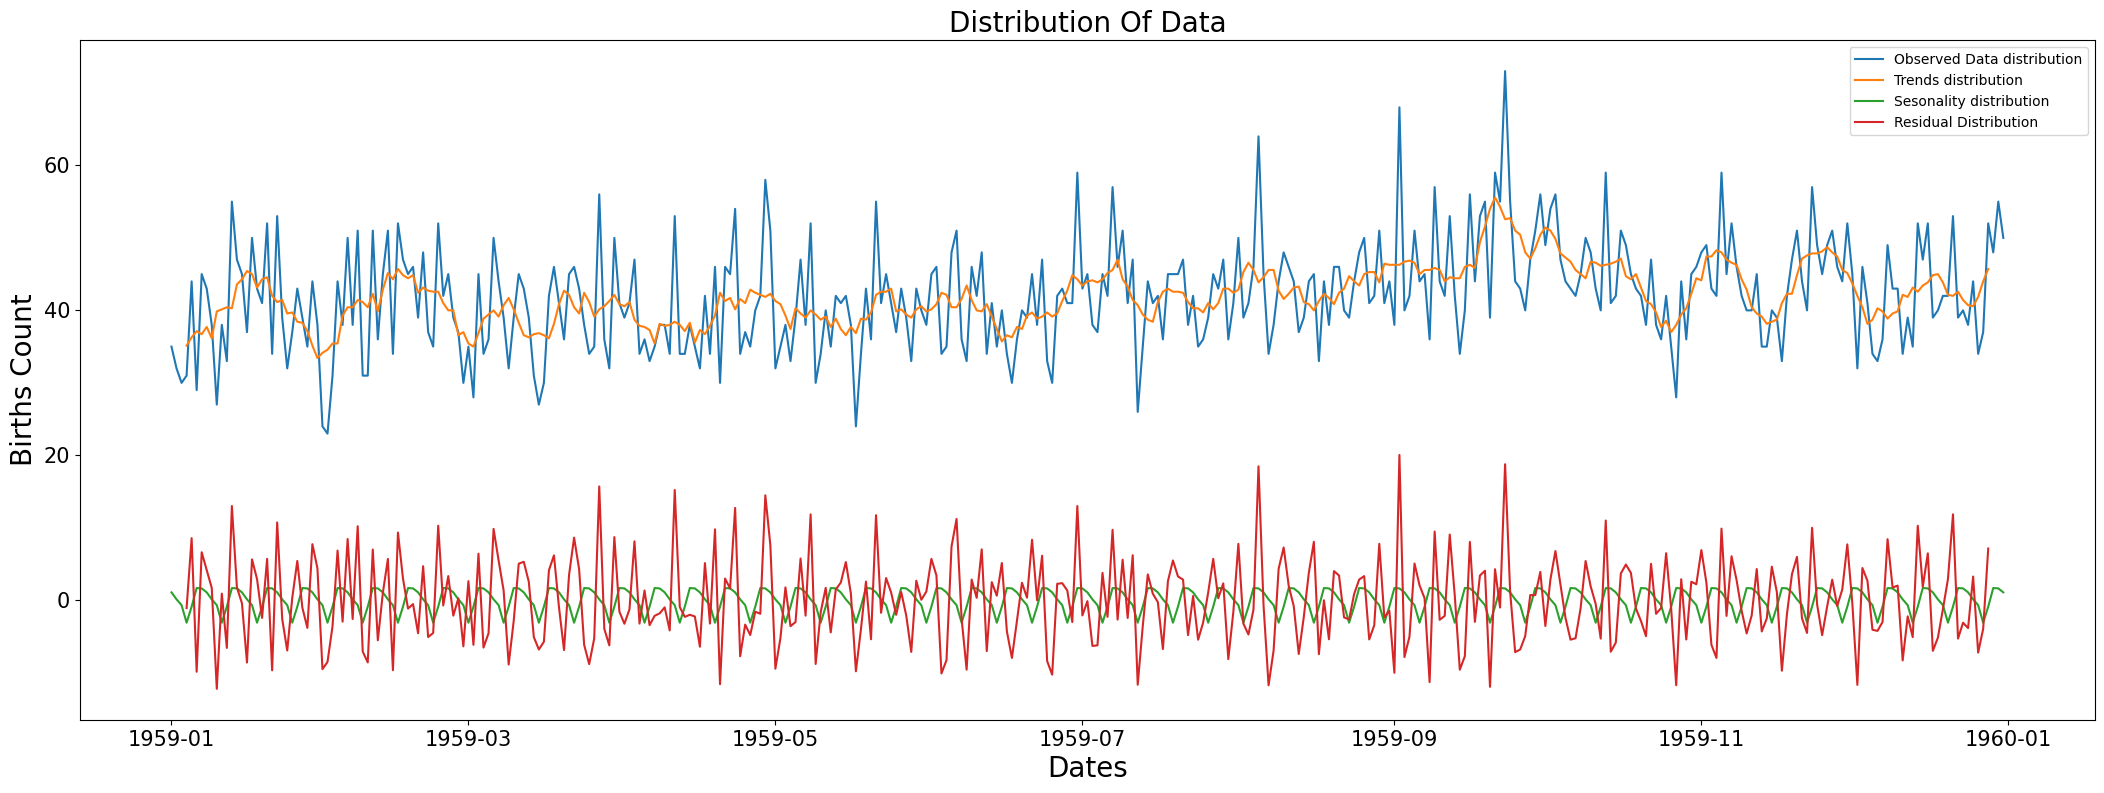

In [135]:
plt.figure(figsize=(26,9),dpi=100)
plt.plot(Observed)
plt.plot(Trends)
plt.plot(Seasonality)
plt.plot(Residual)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Births Count',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Observed Data distribution','Trends distribution','Sesonality distribution','Residual Distribution'])
plt.title('Distribution Of Data',fontsize=20)
plt.show()

- We can here that the observed data and trend distribution is not going very seasonal so we are sure about it is quite seasonal not not that much.
- Also we can see the below the mean squred error or residual are very less as well as the distribution of the seasonlity is also very less.

- So from this we can say that our data is highy Stationary by comparing to the seasonality distribution.


## Let's Check Wheather It is Stationary or Non-Stationary.

- To check weather any time series is Statinary or Non-Stationary we need to use the Dekay-Fuller test.
- In this if our p_values will be greather than or equal to 0.05 that means It is accepting the null hypothesis so that the given Time Series Analysis is Not Stationary.
- If the p_values will less than 0.05 that means It is accepting the Alternate hypothesis so that the given Time Series is the Statinary Time Series.

- **Alternative Hypothesis :- 0.05 > P_values ...This is the Stationary Series.**
- **Null Hypothesis :- p_values >= 0.05 .....This is the Seasonal Series.**

 - **Stationary Series :- Having the Costant mean and Variance throughout the Series.**
 - **Seasonal Series :- Having the some trend or seasonality i.e.high purchase of water in Hot Season and very Purchasing of water in the Mansoon Season.It is opposite to the Stationary Series Charecteristics.**


In [136]:
from statsmodels.tsa.stattools import adfuller

In [137]:
adf_score,p_values,usedlag,nobs,icbest,Restrore = adfuller(data['births'],regression='c', autolag='AIC',)

In [138]:
def is_stationary(add_Series):
  from statsmodels.tsa.stattools import adfuller
  adf_score,p_values,usedlag,nobs,icbest,Restrore = adfuller(add_Series,regression='c', autolag='AIC',)

  if p_values>=0.05:
    print('It is Seasonal Series.')
  else:
    print('It is stationary Series.')

In [96]:
is_stationary(data['births'])

It is stationary Series.


In the Time Series Analysis we mostly predict the values based on the past data.So order to get that data we will use the shift function. That will shift the series data as per the our requirement or seasonality.

- If suppose we have seasonality for the year by year then we have choice to choose shift as 12.
- Otherwise,the if we have monthwise mostly use as 1.
- Here,we have monthwise this time we are going to choose shift as 1.

In [139]:
data['births'].shift(1).head() #Here we can see we have got the shift of one.
#so that,we will the past values for future dates by one shift .

date
1959-01-01     NaN
1959-01-02    35.0
1959-01-03    32.0
1959-01-04    30.0
1959-01-05    31.0
Name: births, dtype: float64

In [140]:
data['Shifted births'] = data['births'].shift(1)

In [141]:
data.head() 

,births,Shifted births
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [142]:
data.tail() #Now we see that the values arev shifted by one so that we will use the last values for the future prediction dates.

,births,Shifted births
date,,
1959-12-27,37,34.0
1959-12-28,52,37.0
1959-12-29,48,52.0
1959-12-30,55,48.0
1959-12-31,50,55.0


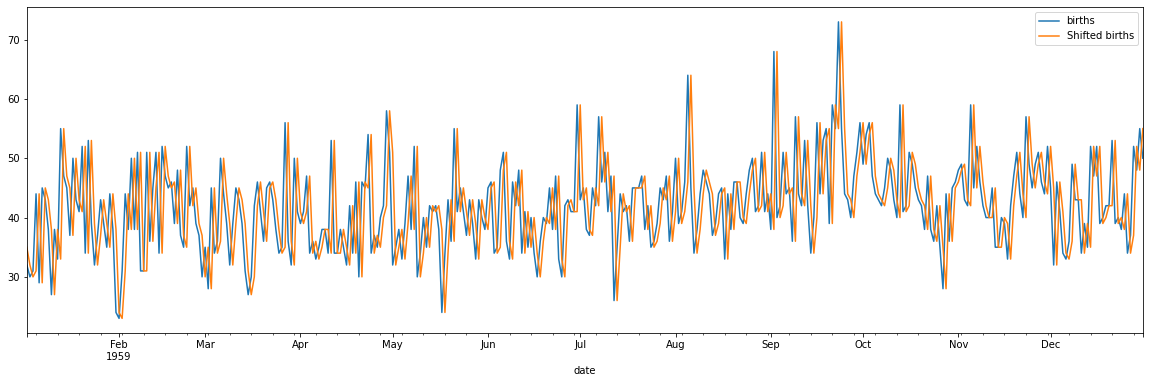

In [143]:
data.dropna().plot(figsize=(20,6))
plt.show()

In between the two series that is actual births and Shifted births we are getting very less diffrence.

They are very much overlapping to each other.

So,From that we can say the error between two series is very less.
lets have look on it.

## Base Model MSE Checking.

In [109]:
from sklearn.metrics import mean_squared_error

In [145]:
data1 = data.copy()

In [146]:
data1.dropna(inplace=True)

In [148]:
MSE = mean_squared_error(data1['births'],data1['Shifted births'])

In [149]:
MSE

84.22252747252747

In [150]:
error = np.sqrt(MSE)
error

9.177283229394606

## Lets go ahead for the modeling of Time Series.

Since our data is in the form of stationary so we are going to  Auto-Regression Integrated  Moving Average model.That is **ARIMA Model.**

While soloving the Problem of time Series we need to consider the three points that are P,D and Q.

Those points represents their important as below way:-

- 1.**P is representing Auto-Regressive costant** It is calculated with the help of **plot_pacf**.

- 2.**D (Diffrencing or Integration) constant** that's indicates how much we will have to  the diffrences or shift in the Series.We have already decided here by using some stastical analysis.

- 3.**Q is the Moving average constant** that is calculate with the help of  **plot_acf**.

Darked blues rigion indicate the critical region.We need choose that values which can correlate with first lag.Here we will see the first lag correlation is 1 because it is correlated itself.
 
The exponetially decrement is good to choose the P and Q values.




In [151]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

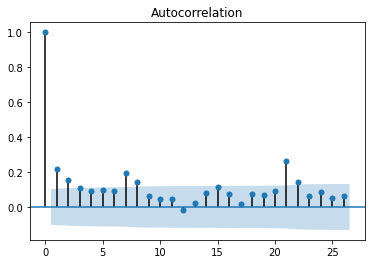

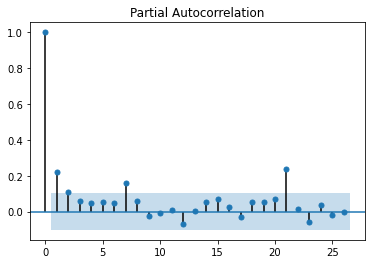

In [154]:
plot_acf(data['births'])
plot_pacf(data['births'])
plt.show()

From the above we can see that the Parial Correlation is giving us the exponential decrement in the partial-correlation upto the 2 lag not in critical rigion.

Similarly,From the above we can see that the Auto-Correlation is giving us the exponential decrement in the partial-correlation upto the 2 lag not in critical rigion.

In [155]:
#we are considering the values of P,D,Q are below
P= 1  #from plot_pacf
D=1  #alraedy decided 
Q =1 #from plot_acf

## ARIMA Modeling.

In [156]:
from statsmodels.tsa.arima_model import ARIMA

In [160]:
birth_train = data['births'][:270]
birth_test = data['births'][270:]

In [183]:
model = ARIMA(birth_train,(1,1,1)).fit()

In [167]:
model.aic
#akike information criteria with this we will get the value.The model will gives the lesser aic number that model is good.

1835.734376458078

In [184]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.births   No. Observations:                  269
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -913.867
Method:                       css-mle   S.D. of innovations              7.193
Date:                Sun, 19 Jul 2020   AIC                           1835.734
Time:                        10:24:58   BIC                           1850.113
Sample:                    01-02-1959   HQIC                          1841.509
                         - 09-27-1959                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0308      0.015      2.035      0.043       0.001       0.060
ar.L1.D.births     0.0777      0.063      1.224      0.222      -0.047       0.202
ma.L1.D.births    -0.9740      0.018    -53.665      0.000      -1.010      -0.938
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           12.8778           +0.0000j           12.8778            0.0000
MA.1            1.0267           +0.0000j            1.0267            0.0000
-----------------------------------------------------------------------------
"""

In [168]:
Forecasting = model.forecast(len(birth_test))[0]

In [169]:
Forecasting

array([46.0192121 , 46.51504487, 46.58197049, 46.61559016, 46.64662352,
       46.67745605, 46.70827298, 46.7390887 , 46.76990433, 46.80071995,
       46.83153557, 46.86235119, 46.89316681, 46.92398243, 46.95479805,
       46.98561367, 47.01642929, 47.04724491, 47.07806053, 47.10887615,
       47.13969177, 47.17050739, 47.20132301, 47.23213862, 47.26295424,
       47.29376986, 47.32458548, 47.3554011 , 47.38621672, 47.41703234,
       47.44784796, 47.47866358, 47.5094792 , 47.54029482, 47.57111044,
       47.60192606, 47.63274168, 47.6635573 , 47.69437292, 47.72518854,
       47.75600416, 47.78681978, 47.8176354 , 47.84845102, 47.87926664,
       47.91008226, 47.94089788, 47.9717135 , 48.00252912, 48.03334474,
       48.06416036, 48.09497598, 48.1257916 , 48.15660722, 48.18742284,
       48.21823845, 48.24905407, 48.27986969, 48.31068531, 48.34150093,
       48.37231655, 48.40313217, 48.43394779, 48.46476341, 48.49557903,
       48.52639465, 48.55721027, 48.58802589, 48.61884151, 48.64

## Lets check the How much the error will be occure.

In [170]:
MSE_ARIMA = mean_squared_error(birth_test,Forecasting)
MSE_ARIMA

59.402832375089595

In [171]:
arima_error =  np.sqrt(MSE_ARIMA)
arima_error

7.707323295093413

- Since,It is showing that the ARIMA model MSE is lesser than the MSE of the base model.
- From that we can say,This model is good model.
- For the further improvement we can do data transformation by using the StandardScalling or Min-Maxscalling.

In [175]:
dataframe = pd.DataFrame({'Actual Data':birth_test,'Forecasted Data':Forecasting})

In [178]:
dataframe.head()

,Actual Data,Forecasted Data
date,,
1959-09-28,47,46.019212
1959-09-29,51,46.515045
1959-09-30,56,46.581970
1959-10-01,49,46.615590
1959-10-02,54,46.646624


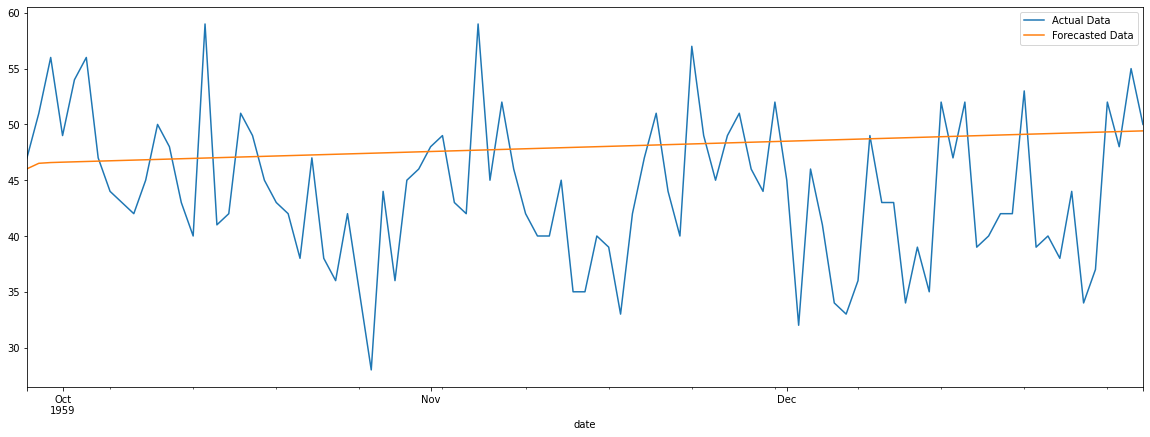

In [181]:
dataframe.plot(figsize=(20,7))
plt.show()

## Thank You !!